# Standardisasi
Scaling, minimize gap, show outlier

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df = pd.read_excel('dataBB.xlsx')
df

,TB,BB
0,0.80,20
1,0.85,25
2,0.92,21
3,0.88,29
4,0.82,30
5,0.86,21
6,0.87,28
7,0.93,27
8,0.81,29
9,1.00,30


<hr>

## Standardisasi Manual

Standardisasi $\displaystyle z_{score} = \frac {X - \bar{X}} {s} $
 dengan nilai standard deviasi $ ddof = 0 $ yaitu $\displaystyle s = \sqrt {\frac {\sum (x - \bar{x})^2} {n - 0}} $
 
 - High outlier jika $ z_{score} > 2.5 $
 - Low outlier jika $ z_{score} < -2.5 $
 - Data terstandardisasi mean ~ 0 dan s ~ 1

In [71]:
# Standar deviasi pandas .std() => ddof = 1, sama kayak excel
df['TB'].std()

0.06186005711819757

In [72]:
# Standar deviasi numpy .std() => ddof = 0
np.std(df['TB'])

0.05868560300448484

In [73]:
np.std(df['TB'], ddof=1)

0.06186005711819757

### Standardisasi z score with Pandas

In [74]:
df['Z TB PD'] = (df['TB'] - df['TB'].mean()) / df['TB'].std()
df['Z BB PD'] = (df['BB'] - df['BB'].mean()) / df['BB'].std()
df

,TB,BB,Z TB PD,Z BB PD
0,0.80,20,-1.196248,-1.510526
1,0.85,25,-0.387972,-0.251754
2,0.92,21,0.743614,-1.258772
3,0.88,29,0.096993,0.755263
4,0.82,30,-0.872938,1.007018
5,0.86,21,-0.226317,-1.258772
6,0.87,28,-0.064662,0.503509
7,0.93,27,0.905269,0.251754
8,0.81,29,-1.034593,0.755263
9,1.00,30,2.036856,1.007018


### Standardisasi z score with Numpy

In [75]:
df['Z TB NP'] = (df['TB'] - df['TB'].mean()) / np.std(df['TB'])
df['Z BB NP'] = (df['BB'] - df['BB'].mean()) / np.std(df['BB'])
df

,TB,BB,Z TB PD,Z BB PD,Z TB NP,Z BB NP
0,0.80,20,-1.196248,-1.510526,-1.260957,-1.592235
1,0.85,25,-0.387972,-0.251754,-0.408959,-0.265372
2,0.92,21,0.743614,-1.258772,0.783838,-1.326862
3,0.88,29,0.096993,0.755263,0.102240,0.796117
4,0.82,30,-0.872938,1.007018,-0.920158,1.061490
5,0.86,21,-0.226317,-1.258772,-0.238559,-1.326862
6,0.87,28,-0.064662,0.503509,-0.068160,0.530745
7,0.93,27,0.905269,0.251754,0.954237,0.265372
8,0.81,29,-1.034593,0.755263,-1.090557,0.796117
9,1.00,30,2.036856,1.007018,2.147034,1.061490


#### Ngecek mean dan std nya Z Score

In [76]:
print(df['Z TB PD'].mean())
print(df['Z TB NP'].mean())
print(df['Z BB PD'].mean())
print(df['Z BB NP'].mean())

print(df['Z TB PD'].std())
print(df['Z TB NP'].std())
print(df['Z BB PD'].std())
print(df['Z BB NP'].std())

1.7763568394002506e-16
1.3322676295501878e-16
-8.881784197001253e-17
0.0
1.0000000000000002
1.0540925533894598
1.0
1.0540925533894596


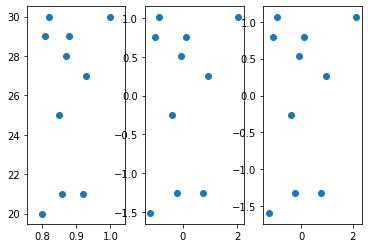

In [77]:
plt.subplot(131)
plt.scatter(df['TB'], df['BB'])
plt.subplot(132)
plt.scatter(df['Z TB PD'], df['Z BB PD'])
plt.subplot(133)
plt.scatter(df['Z TB NP'], df['Z BB NP'])
plt.show()

<hr>

## Standardisasi dengan Sklearn

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()
z = scaler.fit_transform(df[['TB', 'BB']])
z

array([[-1.26095663, -1.59223468],
       [-0.40895891, -0.26537245],
       [ 0.7838379 , -1.32686223],
       [ 0.10223973,  0.79611734],
       [-0.92015754,  1.06148978],
       [-0.23855936, -1.32686223],
       [-0.06815982,  0.53074489],
       [ 0.95423745,  0.26537245],
       [-1.09055708,  0.79611734],
       [ 2.14703426,  1.06148978]])

In [80]:
df['Z TB SKL'] = z[:,0]
df['Z BB SKL'] = z[:,1]
df

,TB,BB,Z TB PD,Z BB PD,Z TB NP,Z BB NP,Z TB SKL,Z BB SKL
0,0.80,20,-1.196248,-1.510526,-1.260957,-1.592235,-1.260957,-1.592235
1,0.85,25,-0.387972,-0.251754,-0.408959,-0.265372,-0.408959,-0.265372
2,0.92,21,0.743614,-1.258772,0.783838,-1.326862,0.783838,-1.326862
3,0.88,29,0.096993,0.755263,0.102240,0.796117,0.102240,0.796117
4,0.82,30,-0.872938,1.007018,-0.920158,1.061490,-0.920158,1.061490
5,0.86,21,-0.226317,-1.258772,-0.238559,-1.326862,-0.238559,-1.326862
6,0.87,28,-0.064662,0.503509,-0.068160,0.530745,-0.068160,0.530745
7,0.93,27,0.905269,0.251754,0.954237,0.265372,0.954237,0.265372
8,0.81,29,-1.034593,0.755263,-1.090557,0.796117,-1.090557,0.796117
9,1.00,30,2.036856,1.007018,2.147034,1.061490,2.147034,1.061490


### Inverse Transform

In [81]:
inv = scaler.inverse_transform(df[['Z TB SKL', 'Z BB SKL']])
print(inv)

[[ 0.8  20.  ]
 [ 0.85 25.  ]
 [ 0.92 21.  ]
 [ 0.88 29.  ]
 [ 0.82 30.  ]
 [ 0.86 21.  ]
 [ 0.87 28.  ]
 [ 0.93 27.  ]
 [ 0.81 29.  ]
 [ 1.   30.  ]]
